In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='-1'

/home/natanael/anaconda3/envs/MaskRCNN/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/natanael/anaconda3/envs/MaskRCNN/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/natanael/anaconda3/envs/MaskRCNN/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/natanael/anaconda3/envs/Mask








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.
Processing 1 images
image                    shape: (850, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


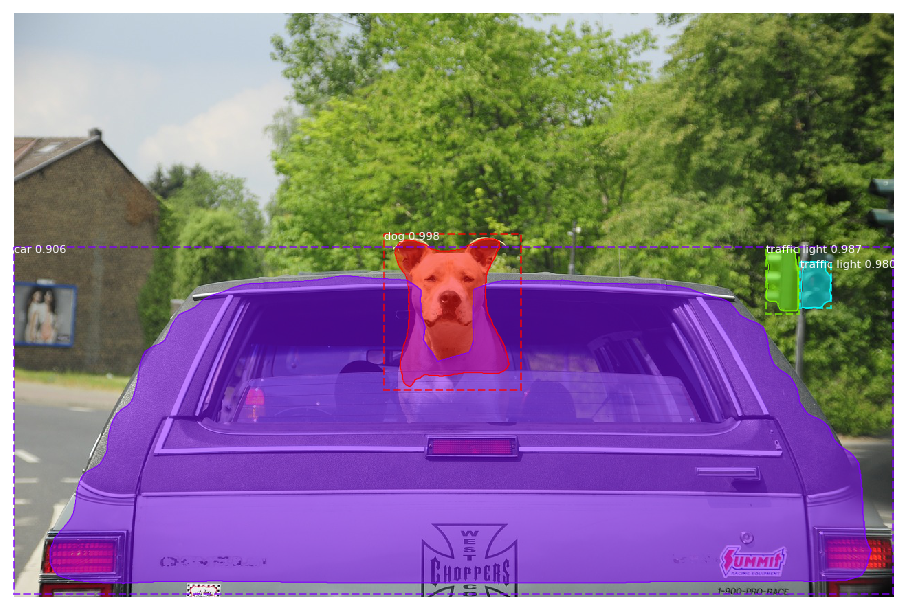

In [2]:
# Mostrando a aplicação funcionando com uma imagem nova aleatória
import cv2
from mrcnn.model import MaskRCNN
from mrcnn.config import Config
from numpy import expand_dims
from mrcnn.model import mold_image
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.pyplot import figure
from mrcnn import visualize

# Criando a classe de previsões 
class ConfiguracoesPrevisoes(Config): 
    NAME = "varios_objetos"
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 81 # dessa vez, teremos 81 classes!

class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']
    
# Carregando a imagem:
imagem_objetos = cv2.imread('/home/natanael/Documents/DidaticaTech/dog_carro.jpg')
imagem_objetos = cv2.cvtColor(imagem_objetos, cv2.COLOR_BGR2RGB)

# Carregando o modelo treinado:
config = ConfiguracoesPrevisoes()
modelo = MaskRCNN(mode='inference', model_dir='/home/natanael/Documents/DidaticaTech/objetos_mask_rcnn', config=config)
modelo.load_weights('/home/natanael/Documents/DidaticaTech/kangaroo/mask_rcnn_coco.h5', by_name=True)

# Mostrando as máscaras e caixas da imagem carregada:
dados = modelo.detect([imagem_objetos], verbose=1)[0]
visualize.display_instances(imagem_objetos, dados['rois'], dados['masks'], dados['class_ids'], class_names, dados['scores'])

In [3]:
dados

{'rois': array([[ 321,  538,  548,  738],
        [ 340, 1095,  438, 1143],
        [ 362, 1145,  430, 1190],
        [ 340,    0,  846, 1280]], dtype=int32),
 'class_ids': array([17, 10, 10,  3], dtype=int32),
 'scores': array([0.9983816, 0.9873182, 0.9796286, 0.9057228], dtype=float32),
 'masks': array([[[False, False, False, False],
         [False, False, False, False],
         [False, False, False, False],
         ...,
         [False, False, False, False],
         [False, False, False, False],
         [False, False, False, False]],
 
        [[False, False, False, False],
         [False, False, False, False],
         [False, False, False, False],
         ...,
         [False, False, False, False],
         [False, False, False, False],
         [False, False, False, False]],
 
        [[False, False, False, False],
         [False, False, False, False],
         [False, False, False, False],
         ...,
         [False, False, False, False],
         [False, False, False

In [6]:
# Manipulando um pouco mais as informações obtidas:
dados['rois'][0]

array([321, 538, 548, 738], dtype=int32)

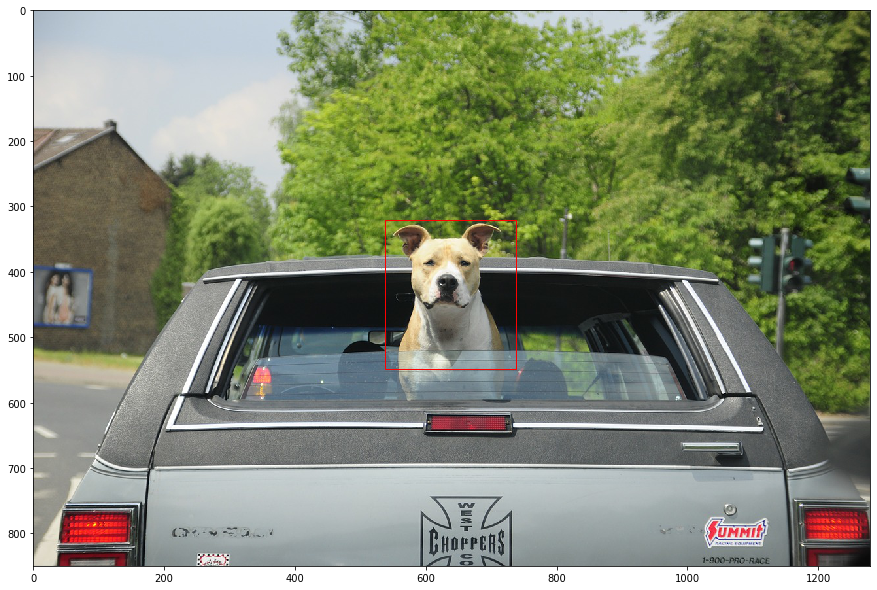

In [11]:
dimensoes_caixa = dados['rois'][0] # coletando as dimensões de um dos objetos
# capturando as dimensões da caixa:
y1 = dimensoes_caixa[0]
x1 = dimensoes_caixa[1]
y2 = dimensoes_caixa[2]
x2 = dimensoes_caixa[3]

# carregando a imagem:
imagem = cv2.imread('/home/natanael/Documents/DidaticaTech/dog_carro.jpg')
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
# mostrando a imagem:
plt.figure(figsize=(15,15))
plt.imshow(imagem)

# desenhando o retângulo:
largura, altura = x2 - x1, y2 - y1
retangulo = Rectangle((x1, y1), largura, altura, fill=False, color='red')

# acrescentando o retângulo na figura:
eixos = plt.gca()
eixos.add_patch(retangulo)
plt.show()

In [12]:
# Analisando o shape das máscaras
mascaras = dados['masks']
mascaras.shape

(850, 1280, 4)

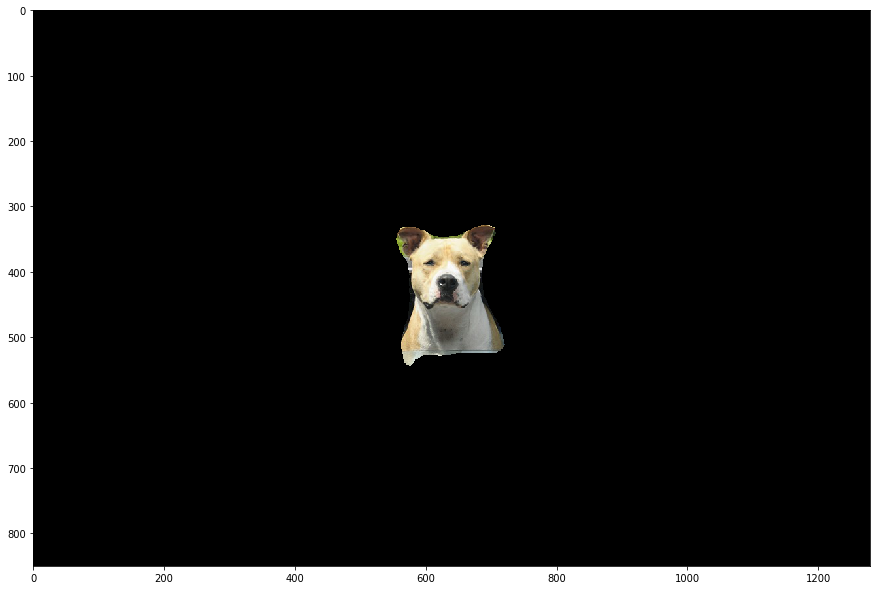

In [18]:
mascaras = dados['masks'] 
mascaras = mascaras.astype(int) # transformando os valores booleanos em inteiros

# carregando a imagem:
imagem = cv2.imread('/home/natanael/Documents/DidaticaTech/dog_carro.jpg')
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
mascara_recortada = imagem # criando uma nova variável de mesmo tamanho da imagem

for i in range(imagem.shape[2]): # para cada canal de cores RGB
    mascara_recortada[:,:,i] = imagem[:,:,i] * mascaras[:,:,0] # multiplica cada pixel da imagem pela máscara de 1's e 0's criada
# Mostrando a figura:
plt.figure(figsize=(15,15)) 
plt.imshow(mascara_recortada)